In [1576]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import load_stl10_dataset
from mnist import get_mnist
import preprocess_data
from autoencoder import Autoencoder
plt.show()
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1221]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
# preprocess and create splits
# x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev, mean, std = preprocess_data.load_stl10_std(
#     n_train_samps=4398, n_test_samps=400, n_valid_samps=200, n_dev_samps=2, scale_fact=3)

x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10_div(
    n_train_samps=4398, n_test_samps=400, n_valid_samps=200, n_dev_samps=2, scale_fact=3)
print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 32x32...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4398, 3, 32, 32)
Train labels shape:  (4398,)
Test data shape:  (400, 3, 32, 32)
Test labels shape:  (400,)
Validation data shape:  (200, 3, 32, 32)
Validation labels shape:  (200,)
dev data shape:  (2, 3, 32, 32)
dev labels shape:  (2,)


In [1222]:
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255
x_train = x_train - 0.5
x_test = x_test - 0.5
x_val = x_val - 0.5

In [1223]:
x_train_reshape = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_val_reshape = x_val.reshape(x_val.shape[0], x_val.shape[1]*x_val.shape[2]*x_val.shape[3])
print(x_train_reshape.shape)

(4398, 3072)


In [1503]:
#best one so far
best = Autoencoder(x_train_reshape.shape[1], 128, 32)
num_epochs = 1000
val_every = 50
print_every = 50
patience = 3
best_train_loss_hist, best_val_loss_hist, best_n_epochs = best.fit(x_train_reshape, x_val_reshape, num_epochs, 1e-4, 750, patience, val_every, print_every)


Epoch: 0 train loss: 0.513 val loss: 0.388
Epoch: 50 train loss: 0.083 val loss: 0.083
Epoch: 100 train loss: 0.064 val loss: 0.066
Epoch: 150 train loss: 0.056 val loss: 0.058
Epoch: 200 train loss: 0.050 val loss: 0.051
Epoch: 250 train loss: 0.044 val loss: 0.045
Epoch: 300 train loss: 0.039 val loss: 0.041
Epoch: 350 train loss: 0.036 val loss: 0.038
Epoch: 400 train loss: 0.033 val loss: 0.035
Epoch: 450 train loss: 0.031 val loss: 0.032
Epoch: 500 train loss: 0.029 val loss: 0.030
Epoch: 550 train loss: 0.028 val loss: 0.029
Epoch: 600 train loss: 0.027 val loss: 0.028
Epoch: 650 train loss: 0.026 val loss: 0.028
Epoch: 700 train loss: 0.026 val loss: 0.027
Epoch: 750 train loss: 0.025 val loss: 0.027
Epoch: 800 train loss: 0.025 val loss: 0.026
Epoch: 850 train loss: 0.025 val loss: 0.026
Epoch: 900 train loss: 0.025 val loss: 0.026
Epoch: 950 train loss: 0.025 val loss: 0.025
Done Training!


In [1249]:
one_neuron = Autoencoder(x_train_reshape.shape[1], 128, 1)
num_epochs = 1000
val_every = 50
print_every = 50
patience = 2
one_train_loss_hist, one_val_loss_hist, one_n_epochs = one_neuron.fit(x_train_reshape, x_val_reshape, num_epochs, 1e-4, 750, patience, val_every, print_every)


Epoch: 0 train loss: 0.098 val loss: 0.091
Epoch: 50 train loss: 0.061 val loss: 0.060
Epoch: 100 train loss: 0.053 val loss: 0.052
Epoch: 150 train loss: 0.051 val loss: 0.051
Epoch: 200 train loss: 0.050 val loss: 0.049
Epoch: 250 train loss: 0.049 val loss: 0.048
Epoch: 300 train loss: 0.048 val loss: 0.048
Epoch: 350 train loss: 0.049 val loss: 0.048
Epoch: 400 train loss: 0.048 val loss: 0.048
Epoch: 450 train loss: 0.048 val loss: 0.048
Epoch: 500 train loss: 0.048 val loss: 0.047
Epoch: 550 train loss: 0.048 val loss: 0.047
Epoch: 600 train loss: 0.048 val loss: 0.047
Epoch: 650 train loss: 0.048 val loss: 0.047
Epoch: 700 train loss: 0.048 val loss: 0.047
Epoch: 750 train loss: 0.049 val loss: 0.047
Epoch: 800 train loss: 0.048 val loss: 0.047
Epoch: 850 train loss: 0.048 val loss: 0.047
Done Training!


In [1252]:

two_neuron = Autoencoder(x_train_reshape.shape[1], 128, 2)
num_epochs = 1000
val_every = 50
print_every = 50
patience = 3
two_train_loss_hist, two_val_loss_hist, two_n_epochs = two_neuron.fit(x_train_reshape, x_val_reshape, num_epochs, 1e-4, 750, patience, val_every, print_every)


Epoch: 0 train loss: 0.104 val loss: 0.095
Epoch: 50 train loss: 0.062 val loss: 0.061
Epoch: 100 train loss: 0.050 val loss: 0.050
Epoch: 150 train loss: 0.047 val loss: 0.046
Epoch: 200 train loss: 0.045 val loss: 0.045
Epoch: 250 train loss: 0.044 val loss: 0.043
Epoch: 300 train loss: 0.042 val loss: 0.041
Epoch: 350 train loss: 0.042 val loss: 0.041
Epoch: 400 train loss: 0.042 val loss: 0.040
Epoch: 450 train loss: 0.041 val loss: 0.040
Epoch: 500 train loss: 0.041 val loss: 0.040
Epoch: 550 train loss: 0.041 val loss: 0.040
Epoch: 600 train loss: 0.041 val loss: 0.040
Epoch: 650 train loss: 0.041 val loss: 0.039
Epoch: 700 train loss: 0.041 val loss: 0.039
Epoch: 750 train loss: 0.041 val loss: 0.039
Epoch: 800 train loss: 0.041 val loss: 0.039
Epoch: 850 train loss: 0.041 val loss: 0.039
Epoch: 900 train loss: 0.041 val loss: 0.039
Epoch: 950 train loss: 0.041 val loss: 0.039
Done Training!


In [1253]:

four_neuron = Autoencoder(x_train_reshape.shape[1], 128, 4)
num_epochs = 1000
val_every = 50
print_every = 50
patience = 3
four_train_loss_hist, four_val_loss_hist, four_n_epochs = four_neuron.fit(x_train_reshape, x_val_reshape, num_epochs, 1e-4, 750, patience, val_every, print_every)


Epoch: 0 train loss: 0.122 val loss: 0.107
Epoch: 50 train loss: 0.061 val loss: 0.061
Epoch: 100 train loss: 0.051 val loss: 0.050
Epoch: 150 train loss: 0.045 val loss: 0.045
Epoch: 200 train loss: 0.042 val loss: 0.041
Epoch: 250 train loss: 0.038 val loss: 0.038
Epoch: 300 train loss: 0.036 val loss: 0.037
Epoch: 350 train loss: 0.036 val loss: 0.035
Epoch: 400 train loss: 0.035 val loss: 0.035
Epoch: 450 train loss: 0.035 val loss: 0.034
Epoch: 500 train loss: 0.034 val loss: 0.034
Epoch: 550 train loss: 0.034 val loss: 0.033
Epoch: 600 train loss: 0.034 val loss: 0.033
Epoch: 650 train loss: 0.034 val loss: 0.033
Epoch: 700 train loss: 0.034 val loss: 0.033
Epoch: 750 train loss: 0.033 val loss: 0.033
Epoch: 800 train loss: 0.034 val loss: 0.033
Epoch: 850 train loss: 0.033 val loss: 0.033
Epoch: 900 train loss: 0.034 val loss: 0.033
Epoch: 950 train loss: 0.034 val loss: 0.033
Done Training!


In [1254]:

ten_neuron = Autoencoder(x_train_reshape.shape[1], 128, 10)
num_epochs = 1000
val_every = 50
print_every = 50
patience = 3
ten_train_loss_hist, ten_val_loss_hist, ten_n_epochs = ten_neuron.fit(x_train_reshape, x_val_reshape, num_epochs, 1e-4, 750, patience, val_every, print_every)


Epoch: 0 train loss: 0.196 val loss: 0.158
Epoch: 50 train loss: 0.066 val loss: 0.066
Epoch: 100 train loss: 0.055 val loss: 0.055
Epoch: 150 train loss: 0.045 val loss: 0.045
Epoch: 200 train loss: 0.040 val loss: 0.040
Epoch: 250 train loss: 0.037 val loss: 0.038
Epoch: 300 train loss: 0.035 val loss: 0.035
Epoch: 350 train loss: 0.033 val loss: 0.033
Epoch: 400 train loss: 0.031 val loss: 0.031
Epoch: 450 train loss: 0.030 val loss: 0.030
Epoch: 500 train loss: 0.030 val loss: 0.030
Epoch: 550 train loss: 0.028 val loss: 0.029
Epoch: 600 train loss: 0.028 val loss: 0.029
Epoch: 650 train loss: 0.029 val loss: 0.029
Epoch: 700 train loss: 0.028 val loss: 0.028
Epoch: 750 train loss: 0.027 val loss: 0.027
Epoch: 800 train loss: 0.027 val loss: 0.026
Epoch: 850 train loss: 0.026 val loss: 0.026
Epoch: 900 train loss: 0.026 val loss: 0.026
Epoch: 950 train loss: 0.026 val loss: 0.026
Done Training!


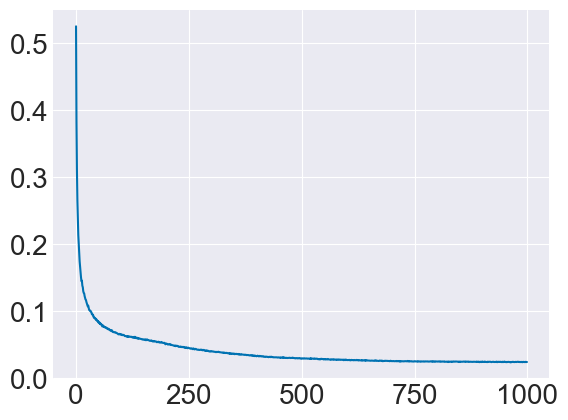

In [1467]:
plt.plot(np.arange(0,best_n_epochs), best_train_loss_hist)
plt.savefig('best/train_loss.svg')
plt.show()

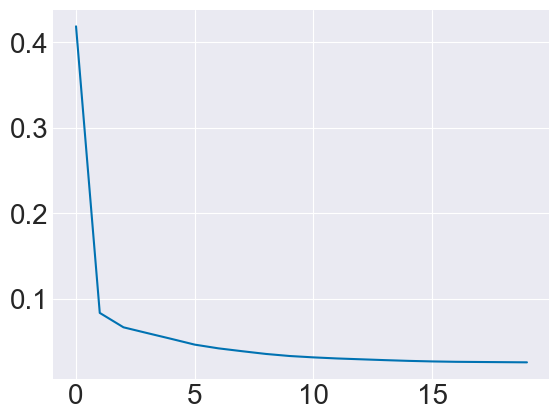

In [1468]:
plt.plot(np.arange(0, best_n_epochs/val_every), best_val_loss_hist)
plt.savefig('best/val_loss.svg')
plt.show()

In [1570]:
test_predict = x_test[9]

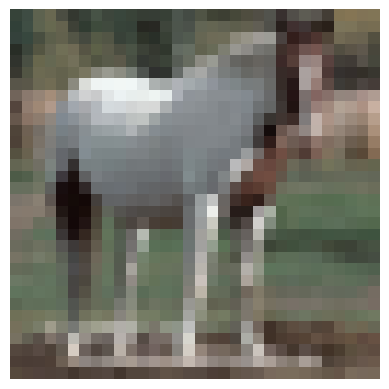

In [1572]:
# predict_std = (test_predict * std) + mean
stl_img = test_predict +.5
stl_img = np.transpose(stl_img, (1, 2, 0))
# plt.imshow(stl_img.T)
plt.imshow(stl_img)
ax = plt.gca()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

ax.set_xticks([])
ax.set_yticks([])
plt.savefig('original_images/stl_10/horse.svg')
plt.show()

(1, 3072)


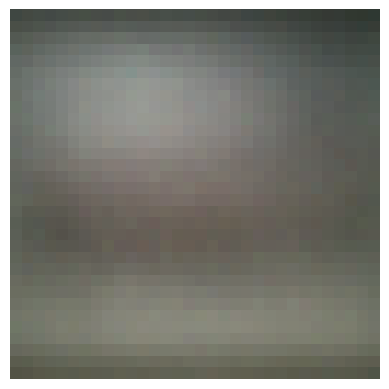

In [1541]:
img = test_predict.reshape(1, x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
out = best.forward(img)
out = out.numpy()
print(out.shape)
recon = np.squeeze(out.reshape(1, x_test.shape[1],x_test.shape[2],x_test.shape[3]))
recon = np.transpose(recon, (1, 2, 0))
# print(recon.shape)
# recon = (recon * std) + mean
recon = recon+.5
plt.imshow(recon)
ax = plt.gca()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('best/horse.svg')
plt.show()

In [1439]:
img = test_predict.reshape(1, x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
bottle_neurons = best_neuron.get_bottle_neurons(img)
print(bottle_neurons)

tf.Tensor(
[[-1.8899547  1.2922616  2.9598403  1.3880452  0.9641411  1.8559988
  -0.1580462  0.8858662  0.9338547  1.0368972]], shape=(1, 10), dtype=float32)


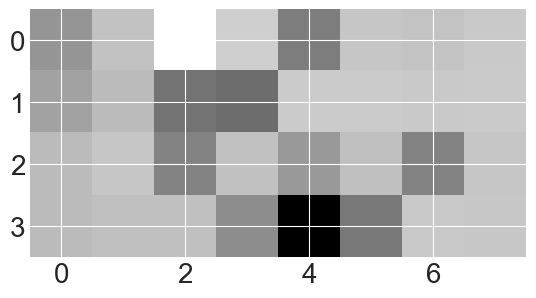

In [1578]:
img = x_test[1].reshape(1, x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
bottle_neurons = best.get_bottle_neurons(img)
bottle_neurons_norm = tf.keras.utils.normalize(bottle_neurons).numpy()
# bottle_neurons_norm = bottle_neurons_norm*255
plt.imshow(bottle_neurons_norm.reshape(4,8))
plt.show()
# print(bottle_neurons)